In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def align_images(image1, image2):
    # 轉換為灰度圖
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # dn1 = cv2.fastNlMeansDenoising(gray1, h=10, templateWindowSize=7)
    # dn2 = cv2.fastNlMeansDenoising(gray2, h=10, templateWindowSize=7)

    # 使用 ORB 檢測和描述特徵
    orb = cv2.ORB_create(nfeatures=300)
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # 使用 BFMatcher 匹配特徵
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # 根據匹配距離排序
    matches = sorted(matches, key=lambda x: x.distance)

    # 提取匹配點
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # 計算透視變換矩陣
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # 應用透視變換
    h, w = image2.shape[:2]
    aligned_image1 = cv2.warpPerspective(image1, M, (w, h))

    return aligned_image1

def compare_images(image1_path, image2_path):
    # 讀取圖片
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    dn1 = cv2.fastNlMeansDenoising(image1, h=10, templateWindowSize=7)
    dn2 = cv2.fastNlMeansDenoising(image2, h=10, templateWindowSize=7)

    # 對齊圖片
    aligned_image1 = align_images(dn1, dn2)
    cv2.imshow("orig1", image1)
    # cv2.imshow("allign1", aligned_image1)
    cv2.imshow("orig2", image2)

    # 計算圖片之間的差異
    difference = cv2.absdiff(aligned_image1, dn2)

    brighten = cv2.convertScaleAbs(difference, alpha=6)

    # 將差異轉換為灰度圖片
    # gray_diff = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)

    # 設定閾值以顯示明顯的不同之處
    _, thresh_diff = cv2.threshold(brighten, 127, 255, cv2.THRESH_BINARY)

    # 顯示差異圖片
    cv2.imshow("Difference", difference)
    cv2.imshow("Brighten Difference", brighten)
    cv2.imshow("Threshold Difference", thresh_diff)

    # 等待按鍵輸入
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 使用範例
compare_images('img0.png', 'img2.png')

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def get_feat(imgpath, mode = 1):
    img0 = cv2.imread(imgpath)
    gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    imgdn1 = cv2.fastNlMeansDenoising(gray0, h=5, templateWindowSize=7)
    imgdn2 = cv2.fastNlMeansDenoising(gray0, h=10, templateWindowSize=7)
    # imgS = cv2.convertScaleAbs(img0, alpha=0.5, beta=128)

    orb = cv2.ORB_create(nfeatures=300)
    kp, des = orb.detectAndCompute(img0, None)
    imgKp1 = cv2.drawKeypoints(img0, kp, None)

    kpdn1, desdn1 = orb.detectAndCompute(imgdn1, None)
    imgKpdn1 = cv2.drawKeypoints(imgdn1, kpdn1, None)

    kpdn2, desdn2 = orb.detectAndCompute(imgdn2, None)
    imgKpdn2 = cv2.drawKeypoints(imgdn2, kpdn2, None)

    plt.figure(figsize=(15,6))
    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(imgKpdn1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(imgKpdn2, cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(imgKp1, cv2.COLOR_BGR2RGB))
    plt.show()

    if mode == 0:
        return (kp, des)
    if mode == 1:
        return (kpdn1, desdn1)
    if mode == 2:
        return (kpdn2, desdn2)
    
    raise

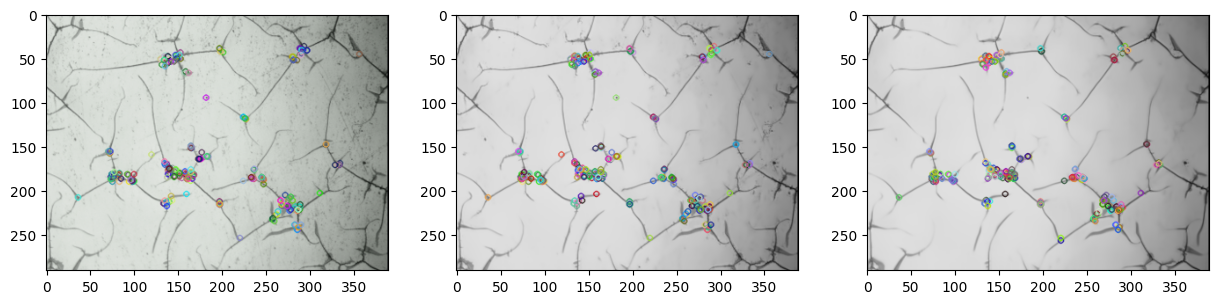

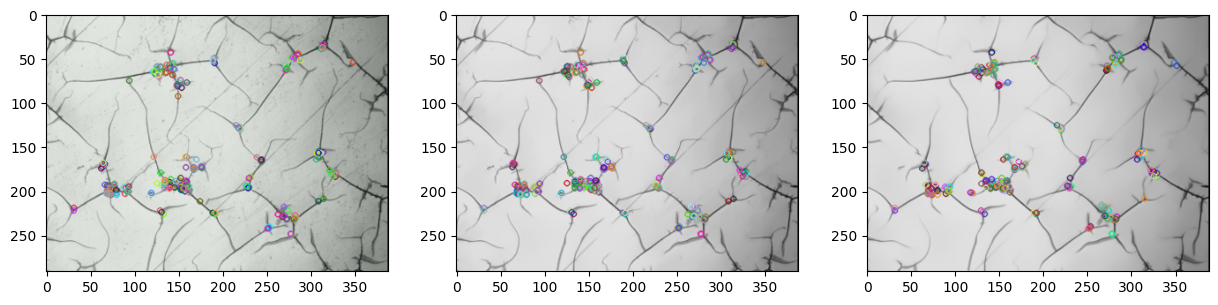

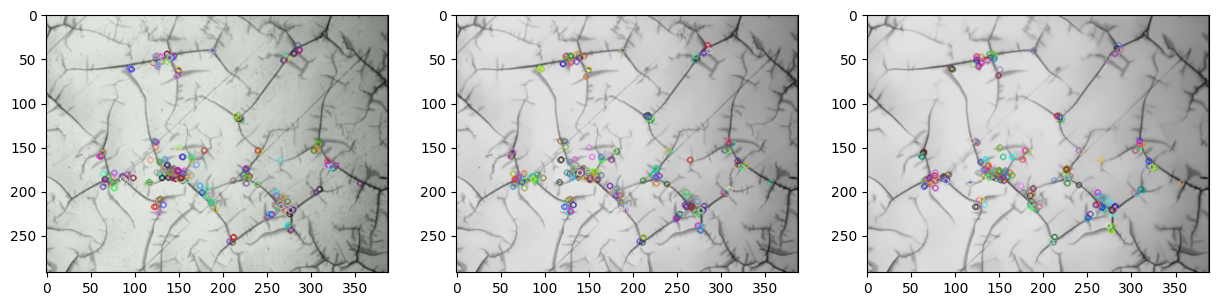

In [70]:
_ = get_feat('img0.png')
_ = get_feat('img1.png')
_ = get_feat('img2.png')

In [5]:
import cv2
import numpy as np

# 讀取圖像
image = cv2.imread('./img0.png')

# 轉換到灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 應用高斯模糊
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 適應性閾值
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 3)

# 尋找輪廓
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 繪製輪廓到原始圖像上
thickness = 3
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness)  # 綠色，厚度為2

# 保存圖像
cv2.imwrite(f'contoured_image_{thickness}.png', image)

# 顯示圖像
cv2.imshow('Image with Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()